In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import ast
import os
#os.chdir('/home/bojk/Data/') #this is when opened in '/home/bojk/Data/notebooks' on linux Quakelab
os.chdir('/Users/bojk/Google Drive/QuakeLab/Data/')
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
sys.path.append('/Users/bojk/Google Drive/QuakeLab/minimeta_pyfiles/')
import imp
import HTSeq
from scipy.stats import powerlaw
#import minimetagenome_analysis as minimeta

import mock_metagenome_creation as mock
imp.reload(mock)
#import reassembly as rea
#import subcluster_bins as sub
#import checkm_out_plot as cop
#import checkm_out as co

import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['legend.fontsize'] = 14

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [78]:
metagenome_fasta = '/home/datastorage/ASSEMBLY_DATA/PermafrostFranklinBluffs/Combined_Analysis/super_contigs.PermafrostFranklinBluffs.fasta'
save_dir = 'Permafrost/FranklinBluffs/pickles/'
maindf = pd.read_pickle(save_dir+'maindf_withDepth')

In [3]:
imp.reload(mock)
#contig6mer,k6mer = mock.make_kmertable_from_fasta_contigs(metagenome_fasta,6,save_dir)    

Total number of fasta sequences:16985
----------------------------------------------------
Started collecting kmers, dimensionality = 4096
Local time: 16:56
----------------------------------------------------
----------------------------------------------------
Progress: 2.94 %, local time: 17:7
Total elapsed time is 11.46 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 5.89 %, local time: 17:19
Total elapsed time is 23.10 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 8.83 %, local time: 17:30
Total elapsed time is 34.51 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 11.78 %, local time: 17:42
Total elapsed time is 46.05 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 14.72 %, local 

----------------------------------------------------
Progress: 100.09 %, local time: 23:29
Total elapsed time is 392.94 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 103.03 %, local time: 23:40
Total elapsed time is 404.72 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 105.98 %, local time: 23:53
Total elapsed time is 416.83 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 108.92 %, local time: 0:4
Total elapsed time is 428.53 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 111.86 %, local time: 0:16
Total elapsed time is 440.19 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 114.81 %, local time: 0:28
Total el

----------------------------------------------------
Progress: 200.18 %, local time: 6:30
Total elapsed time is 813.81 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 203.12 %, local time: 6:41
Total elapsed time is 825.27 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 206.06 %, local time: 6:52
Total elapsed time is 836.60 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 209.01 %, local time: 7:4
Total elapsed time is 847.86 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 211.95 %, local time: 7:15
Total elapsed time is 859.08 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 214.9 %, local time: 7:26
Total elapse

----------------------------------------------------
Progress: 297.32 %, local time: 13:29
Total elapsed time is 1233.54 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 300.26 %, local time: 13:41
Total elapsed time is 1245.07 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 303.21 %, local time: 13:52
Total elapsed time is 1256.57 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 306.15 %, local time: 14:4
Total elapsed time is 1268.08 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 309.1 %, local time: 14:18
Total elapsed time is 1282.33 minutes
----------------------------------------------------
----------------------------------------------------
Progress: 312.04 %, local time: 14:38
T

In [4]:
k6mer.head()

,AAAAAA,AAAAAC,AAAAAT,AAAAAG,AAAACA,AAAACC,AAAACT,AAAACG,AAAATA,AAAATC,...,GGGGCT,GGGGCG,GGGGTA,GGGGTC,GGGGTT,GGGGTG,GGGGGA,GGGGGC,GGGGGT,GGGGGG
SuperContig_k91_504_flag=1_multi=8.0037_len=8186_FranklinBluffs_40cm_Bulk,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,...,0.0,3.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0
SuperContig_k91_534_flag=1_multi=8.0003_len=14225_FranklinBluffs_40cm_Bulk,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,3.0,7.0,2.0,6.0,5.0,1.0,4.0,1.0,1.0,0.0
SuperContig_k91_570_flag=1_multi=6.0000_len=5568_FranklinBluffs_40cm_Bulk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,4.0,1.0,3.0,1.0,5.0,3.0,2.0,1.0,1.0
SuperContig_k91_580_flag=0_multi=12.1001_len=10996_FranklinBluffs_40cm_Bulk,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3.0,8.0,4.0,9.0,4.0,4.0,4.0,3.0,5.0,2.0
SuperContig_k91_754_flag=0_multi=12.0033_len=15741_FranklinBluffs_40cm_Bulk,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,4.0,6.0,1.0,14.0,2.0,4.0,4.0,3.0,4.0,1.0


In [26]:
FBcontigdf = pd.read_pickle(save_dir+'contigdf_from_metagenome_fasta_6mer.pickle')#.head()

In [9]:
pd.read_pickle(save_dir+'maindf_withDepth').head().columns

Index(['Scaffold ID', 'Scaffold Name', 'Genome ID', 'Genome', 'Gene Count',
       'Sequence Length', 'GC Content', 'Read Depth', 'Lineage Domain',
       'Lineage Phylum', 'Lineage Class', 'Lineage Order', 'Lineage Family',
       'Lineage Genus', 'Lineage Species', 'Lineage Percentage', 'Ecosystem',
       'Ecosystem Category', 'Ecosystem Type', 'Ecosystem Subtype',
       'Specific Ecosystem', 'contig_name', 'nameforreal', 'x_30_a', 'x_30_n',
       'x_40_a', 'x_40_n', 'x_50_a', 'x_50_n', 'x_60_a', 'x_60_n', 'x_70_a',
       'x_70_n', 'x_80_a', 'x_80_n', 'y_30_a', 'y_30_n', 'y_40_a', 'y_40_n',
       'y_50_a', 'y_50_n', 'y_60_a', 'y_60_n', 'y_70_a', 'y_70_n', 'y_80_a',
       'y_80_n', 'DBclusternum', 'Bin', 'sampling depth'],
      dtype='object')

In [12]:
norm_cov = pd.read_pickle(save_dir+'FranklinBluffs_chipdf_normalized')
norm_cov_mini = norm_cov[~norm_cov.index.str.contains('Bulk')]
norm_cov_bulk = norm_cov[norm_cov.index.str.contains('Bulk')]

In [18]:
norm_cov_mini_nobulk = norm_cov_mini.drop(['FranklinBluffs_40cm_Bulk','FranklinBluffs_55cm_Bulk'],axis=1)
# make pyfile for permafrost analysis similar
# to mock metagenome PC and minCS sweep


In [20]:
abs_cov = pd.read_pickle(save_dir+'FranklinBluffs_chipdf_bpcounts')

# do 6-mer absCov tSNE + PC sweep

In [21]:
abs_cov.head()

,chip2_B04_55,chip2_F10_55,chip2_H08_55,chip3_F03_40,chip2_B05_55,chip1_F02_40,chip4_G01_55,chip3_A03_40,chip2_D11_55,chip3_B05_40,...,chip1_B12_40,chip3_C09_40,chip4_D07_55,chip4_C08_55,chip3_D05_40,chip4_A01_55,chip3_C02_40,chip3_H07_40,FranklinBluffs_55cm_Bulk,FranklinBluffs_40cm_Bulk
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
SuperContig_NODE_3114_length_7886_cov_11.2671,3078.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0,24.0
SuperContig_NODE_211_length_26223_cov_2.60622_FranklinBluffs_40cm_Bulk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420.0,3534.0
SuperContig_k91_119055_flag=0_multi=8.2386_len=8942_FranklinBluffs_40cm_Bulk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,480.0,572.0
SuperContig_k91_1175926_flag=1_multi=7.0005_len=8669_FranklinBluffs_40cm_Bulk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,466.0
SuperContig_k91_300697_flag=0_multi=12.3080_len=5669_FranklinBluffs_55cm_Bulk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,618.0,454.0


In [22]:
combined6merAbs = k6mer.join(abs_cov)

In [24]:
combined6merAbs.head()

,AAAAAA,AAAAAC,AAAAAT,AAAAAG,AAAACA,AAAACC,AAAACT,AAAACG,AAAATA,AAAATC,...,chip1_B12_40,chip3_C09_40,chip4_D07_55,chip4_C08_55,chip3_D05_40,chip4_A01_55,chip3_C02_40,chip3_H07_40,FranklinBluffs_55cm_Bulk,FranklinBluffs_40cm_Bulk
SuperContig_k91_504_flag=1_multi=8.0037_len=8186_FranklinBluffs_40cm_Bulk,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,678.0,476.0
SuperContig_k91_534_flag=1_multi=8.0003_len=14225_FranklinBluffs_40cm_Bulk,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1898.0,984.0
SuperContig_k91_570_flag=1_multi=6.0000_len=5568_FranklinBluffs_40cm_Bulk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,608.0,294.0
SuperContig_k91_580_flag=0_multi=12.1001_len=10996_FranklinBluffs_40cm_Bulk,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,456.0,1160.0
SuperContig_k91_754_flag=0_multi=12.0033_len=15741_FranklinBluffs_40cm_Bulk,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,596.0,1596.0


In [34]:
import minimetagenome_dimensionality as miniD
imp.reload(miniD)
maindir = 'Permafrost/FranklinBluffs/kmerPCA/'
miniD.perform_complete_analysis_Coverage(combined6merAbs,6,FBcontigdf,maindir,'FB6mers')

tSNE-df previously made, loading from pickle, full path = 
Permafrost/FranklinBluffs/kmerPCA/tsnedf_FB6mers_6mers.pickle
Performing PCA...


/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 965.55 seconds
performing cluster sweep of tSNE of 18 PCs
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 1043.73 seconds
performing cluster sweep of tSNE of 26 PCs
building tSNE of 38 PCs
finished building tSNE of 38 PCs, this took 1255.76 seconds
performing cluster sweep of tSNE of 38 PCs
building tSNE of 55 PCs
finished building tSNE of 55 PCs, this took 1251.65 seconds
performing cluster sweep of tSNE of 55 PCs
building tSNE of 78 PCs
finished building tSNE of 78 PCs, this took 1544.05 seconds
performing cluster sweep of tSNE of 78 PCs
building tSNE of 113 PCs
finished building tSNE of 113 PCs, this took 1597.33 seconds
performing cluster sweep of tSNE of 113 PCs
building tSNE of 162 PCs
finished building tSNE of 162 PCs, this took 2063.84 seconds
performing cluster sweep of tSNE of 162 PCs
building tSNE of 234 PCs
finished building tSNE of 234 PCs, this took 2233.93 seconds
performing cluster s

,x_4406mers,y_4406mers,Sequence length,GC,x_PC18,y_PC18,x_PC26,y_PC26,x_PC38,y_PC38,...,x_PC234,y_PC234,x_PC336,y_PC336,x_PC483,y_PC483,x_PC695,y_PC695,x_PC1000,y_PC1000
SuperContig_k91_504_flag=1_multi=8.0037_len=8186_FranklinBluffs_40cm_Bulk,17.440187,14.661492,8186,0.609822,31.449099,16.674297,32.321072,-21.449802,20.314341,15.871403,...,1.311303,23.482559,-11.493380,-23.088034,-4.197424,22.869148,-23.623404,10.286780,-4.150480,19.650446
SuperContig_k91_534_flag=1_multi=8.0003_len=14225_FranklinBluffs_40cm_Bulk,21.762468,-15.969311,14225,0.666432,-36.031857,31.385908,-45.139385,18.215672,-28.719315,38.343803,...,18.101540,-17.508879,23.277008,-6.947829,18.079014,4.354777,-11.348080,-2.906310,8.940234,-8.819864
SuperContig_k91_570_flag=1_multi=6.0000_len=5568_FranklinBluffs_40cm_Bulk,22.108189,-15.208263,5568,0.666128,-37.946987,32.257046,-46.408886,19.543682,-30.807346,38.002769,...,18.537842,-17.849537,23.543573,-5.850795,1.645215,-0.215510,2.910400,-3.451320,1.593921,5.891795
SuperContig_k91_580_flag=0_multi=12.1001_len=10996_FranklinBluffs_40cm_Bulk,-0.476030,-26.936768,10996,0.694980,-30.813421,-16.397057,-16.415953,-16.532303,-28.596277,-15.963980,...,7.822777,-10.510424,0.959340,-10.700715,-6.452682,-2.900137,2.841706,-5.124422,6.321249,-1.757056
SuperContig_k91_754_flag=0_multi=12.0033_len=15741_FranklinBluffs_40cm_Bulk,5.421711,-26.578478,15741,0.706181,-20.863512,-0.805895,-16.991306,-29.970053,-28.516836,-15.425170,...,9.367974,-12.535742,7.456110,-7.997727,-10.990508,1.575369,9.130171,-12.282938,30.308222,3.611946
SuperContig_k91_789_flag=1_multi=12.0394_len=6431_FranklinBluffs_40cm_Bulk,0.938568,-16.324198,6431,0.670036,-20.446880,10.643420,-28.400984,6.946762,-13.643809,9.875041,...,-5.196331,-2.200244,1.493275,-4.409707,7.661726,11.705852,-2.688944,1.183972,3.220274,-4.847385
SuperContig_k91_802_flag=0_multi=11.9815_len=6409_FranklinBluffs_40cm_Bulk,-0.722737,15.403188,6409,0.599782,12.046456,28.148720,20.125305,-11.762012,16.767271,1.054635,...,-6.211083,-0.702623,-10.560297,1.821133,5.070717,-7.449762,10.164333,-0.328994,9.505912,1.423749
SuperContig_k91_850_flag=0_multi=12.4634_len=7935_FranklinBluffs_40cm_Bulk,-5.625760,25.155169,7935,0.512917,44.989063,13.849960,35.275131,22.743128,43.190342,17.815582,...,20.239782,9.349652,-17.462736,-6.350407,-0.315425,-1.260549,-2.052942,2.109732,18.964067,29.997683
SuperContig_k91_919_flag=0_multi=13.9603_len=10441_FranklinBluffs_40cm_Bulk,-27.692301,-4.693024,10441,0.669668,-0.551479,50.416286,-6.298125,49.259857,15.691387,46.367210,...,-18.640512,-36.145958,33.632198,-10.509114,-10.758497,-28.689686,10.021777,18.644903,-19.383480,17.865358
SuperContig_k91_925_flag=0_multi=7.5024_len=17916_FranklinBluffs_40cm_Bulk,1.481100,-9.344214,17916,0.645959,4.282631,-7.203654,-10.383144,8.920259,-9.458066,-7.686090,...,3.505353,-2.493682,-8.012158,-18.443045,-6.330636,-11.678760,-11.818562,-6.967061,12.371198,-14.036900


In [1]:
tsne6 = pd.read_pickle(maindir+'FB6mers6mers_all_tSNEs')
f,ax = plt.subplots(figsize=(10,10))
tsne6.plot.scatter(0,1,c=tsne6['GC'],s=tsne6['Sequence length'].astype(float)/1e2,alpha=.05,ax=ax)

NameError: name 'pd' is not defined

# ground truth (absCov chip) PCA and sweep

In [194]:
import pySankey

In [42]:
cols = tsne6.columns

In [52]:
axes = list(set([f for f in cols[4:]]))
pcs_done = list(set([int(f[4:]) for f in cols[4:]]))

In [58]:
savename = 'FBk6mer_PCA_withCov'
for pc in np.sort(pcs_done):
    x = 'x_PC'+str(pc)
    y = 'y_PC'+str(pc)
    f,ax = plt.subplots(figsize=(12,10))
    tsne6.plot.scatter(x,y,c=tsne6['GC'],s=tsne6['Sequence length'].astype(float)/3e2
                       ,alpha=.05,ax=ax,cmap='RdBu_r')
    plt.title(str(pc)+' PCs')
    f.savefig(maindir+'plots/tsne_'+savename+'_'+str(pc)+'PCs.png')
    plt.close(f)

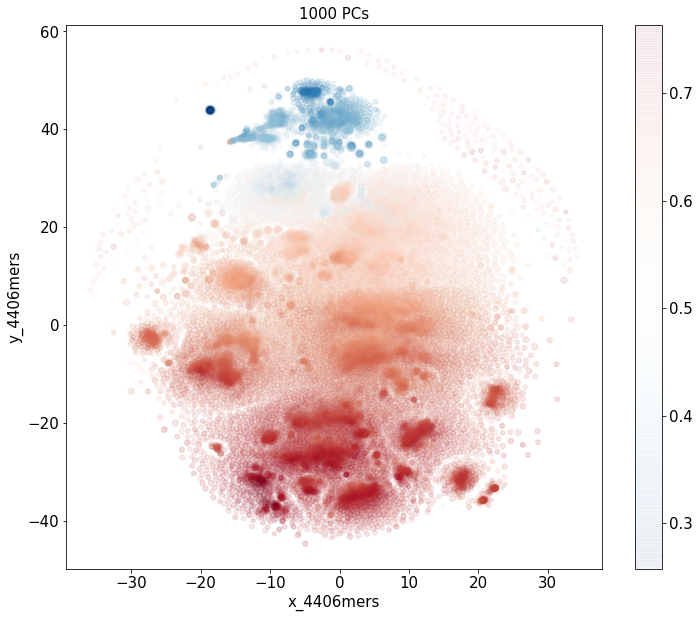

In [60]:
f,ax = plt.subplots(figsize=(12,10))
tsne6.plot.scatter(0,1,c=tsne6['GC'],s=tsne6['Sequence length'].astype(float)/3e2
                   ,alpha=.05,ax=ax,cmap='RdBu_r')
plt.title(str(pc)+' PCs')
f.savefig(maindir+'plots/tsne_'+savename+'_'+str(4406)+'dims.png')

In [64]:
abscovmini = abs_cov[~abs_cov.index.str.contains('Bulk')].drop(['FranklinBluffs_55cm_Bulk','FranklinBluffs_40cm_Bulk'],axis=1)

In [73]:
imp.reload(miniD)
maindir = 'Permafrost/FranklinBluffs/kmerPCA/'

miniD.perform_complete_analysis_Coverage(abscovmini,6,FBcontigdf,maindir,'FBminiCovOnly')

tSNE-df previously made, loading from pickle, full path = 
Permafrost/FranklinBluffs/kmerPCA/tsnedf_FBminiCovOnly_6mers.pickle
Performing PCA...


/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


building tSNE of 18 PCs
finished building tSNE of 18 PCs, this took 40.25 seconds
building tSNE of 26 PCs
finished building tSNE of 26 PCs, this took 40.55 seconds
building tSNE of 38 PCs
finished building tSNE of 38 PCs, this took 43.20 seconds
building tSNE of 55 PCs
finished building tSNE of 55 PCs, this took 43.46 seconds
building tSNE of 78 PCs
finished building tSNE of 78 PCs, this took 48.57 seconds
building tSNE of 113 PCs
finished building tSNE of 113 PCs, this took 51.79 seconds
building tSNE of 162 PCs
finished building tSNE of 162 PCs, this took 54.84 seconds
building tSNE of 234 PCs
finished building tSNE of 234 PCs, this took 59.74 seconds
building tSNE of 336 PCs
finished building tSNE of 336 PCs, this took 67.26 seconds
building tSNE of 483 PCs
finished building tSNE of 483 PCs, this took 66.66 seconds
building tSNE of 695 PCs
finished building tSNE of 695 PCs, this took 67.50 seconds
building tSNE of 1000 PCs
finished building tSNE of 1000 PCs, this took 67.73 seconds


,x_308mers,y_308mers,Sequence length,GC,x_PC18,y_PC18,x_PC26,y_PC26,x_PC38,y_PC38,...,x_PC234,y_PC234,x_PC336,y_PC336,x_PC483,y_PC483,x_PC695,y_PC695,x_PC1000,y_PC1000
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
SuperContig_NODE_3114_length_7886_cov_11.2671,15.319010,36.892616,7886,0.419351,12.679913,47.582844,35.370468,11.230887,31.216551,32.177120,...,28.627039,30.177187,30.287664,-7.107831,30.287664,-7.107831,30.287664,-7.107831,30.287664,-7.107831
SuperContig_NODE_6017_length_5226_cov_107.278,-11.217241,45.743073,5226,0.426713,-22.587091,26.970051,-19.840212,25.371496,-3.644030,30.469948,...,6.072226,22.306810,6.015193,-30.782938,6.015193,-30.782938,6.015193,-30.782938,6.015193,-30.782938
SuperContig_NODE_4571_length_6271_cov_1.96841,9.478744,60.086613,6271,0.380801,14.071022,65.911766,5.842048,62.215988,-3.841901,64.799721,...,6.047374,74.934654,60.451759,-15.024764,60.451759,-15.024764,60.451759,-15.024764,60.451759,-15.024764
SuperContig_NODE_810_length_14975_cov_1.0726,-13.867577,-59.764816,14975,0.630250,9.705292,-45.788288,-3.318787,-31.476511,3.554455,-35.563530,...,15.744901,-31.234751,-2.403472,47.214279,-2.403472,47.214279,-2.403472,47.214279,-2.403472,47.214279
SuperContig_NODE_5281_length_5700_cov_0.368327,22.090063,13.045877,5700,0.539474,56.726852,-30.361378,39.558266,-2.381694,51.699219,-35.128323,...,-27.311132,56.256474,75.345451,2.560938,75.345451,2.560938,75.345451,2.560938,75.345451,2.560938
SuperContig_NODE_5398_length_5618_cov_0.204747,50.655621,-44.485092,5618,0.364543,37.862545,-59.383820,51.492519,-20.965546,16.240507,-72.040085,...,-7.603892,-79.459869,30.873156,59.331207,30.873156,59.331207,30.873156,59.331207,30.873156,59.331207
SuperContig_NODE_5964_length_5261_cov_0.1358,-13.621648,-58.127892,5261,0.501616,8.238192,-47.292858,-1.865861,-32.379311,2.719634,-34.463902,...,14.546970,-30.325182,-2.777225,45.799053,-2.777225,45.799053,-2.777225,45.799053,-2.777225,45.799053
SuperContig_NODE_6018_length_5226_cov_0.299785,68.769562,-4.099813,5226,0.538462,34.007168,19.820551,35.737602,28.696104,59.928699,14.890059,...,58.997002,-30.693102,66.730087,27.296665,66.730087,27.296665,66.730087,27.296665,66.730087,27.296665
SuperContig_NODE_453_length_18533_cov_6.57117,48.199009,58.326836,18533,0.411212,45.856773,-49.791893,43.287731,-28.602949,49.127548,43.935043,...,74.237267,20.964291,9.174487,-75.902390,9.174487,-75.902390,9.174487,-75.902390,9.174487,-75.902390


In [74]:
def plotPCs(tsnedf,maindir,savename):
    #tsne6minicov = pd.read_pickle(maindir+'FBminiCovOnly6mers_all_tSNEs')
    cols = tsnedf.columns
    axes = list(set([f for f in cols[4:]]))
    pcs_done = list(set([int(f[4:]) for f in cols[4:]]))
    #savename = 'FBk6mer_PCA_miniOnlyCov'
    for pc in np.sort(pcs_done):
        x = 'x_PC'+str(pc)
        y = 'y_PC'+str(pc)
        f,ax = plt.subplots(figsize=(12,10))
        tsnedf.plot.scatter(x,y,c=tsnedf['GC'],s=tsnedf['Sequence length'].astype(float)/3e2
                           ,alpha=.05,ax=ax,cmap='RdBu_r')
        plt.title(str(pc)+' PCs')
        f.savefig(maindir+'plots/tsne_'+savename+'_'+str(pc)+'PCs.png')
        plt.close(f)

In [75]:
tsne6minicov = pd.read_pickle(maindir+'FBminiCovOnly6mers_all_tSNEs')
savename = 'FBk6mer_PCA_miniOnlyCov'
plotPCs(tsne6minicov,maindir,savename)

In [80]:
idx = tsne6minicov.index
keys = maindf.loc[idx,'Lineage Phylum'].unique();values = sns.color_palette('husl',len(keys))
lut = dict(zip(keys,values))
color = maindf['Lineage Phylum'].map(lut)

array(['Gemmatimonadetes', 'Unassigned', 'Actinobacteria', 'Nitrospirae',
       'Proteobacteria', 'Cyanobacteria', 'Chloroflexi', 'Acidobacteria',
       'Verrucomicrobia', 'Bacteroidetes', 'Planctomycetes', 'Firmicutes',
       'dsDNA viruses, no RNA stage', 'Thaumarchaeota', 'Chlamydiae',
       'Microgenomates', 'Ignavibacteriae', 'Omnitrophica',
       'candidate division NC10', 'Deinococcus-Thermus',
       'Candidatus Saccharibacteria', 'Parcubacteria', 'Atribacteria',
       'Euryarchaeota', 'Spirochaetes', 'Aminicenantes', 'BRC1',
       'Chlorobi', 'Nitrospinae', 'Marinimicrobia', 'Acetothermia',
       'Caldithrixae', 'ssDNA viruses'], dtype=object)

In [1]:
import checkm_out as co
import checkm_out_plot as cp

ModuleNotFoundError: No module named 'checkm_out'

In [201]:
imp.reload(co)
indir = 'Permafrost/WestDock/bins/miniCovOnly/PC13checkm/'
PC13 = co.make_checkm_output_df(indir,'PC13checkmdf')
indir = 'Permafrost/WestDock/bins/miniCovOnly/PC18checkm/'
PC18 = co.make_checkm_output_df(indir,'PC18checkmdf')
indir = 'Permafrost/WestDock/bins/miniCovOnly/PC26checkm/'
PC26 = co.make_checkm_output_df(indir,'PC26checkmdf')
indir = 'Permafrost/WestDock/bins/miniCovOnly/PC38checkm/'
PC38 = co.make_checkm_output_df(indir,'PC38checkmdf')
indir = 'Permafrost/WestDock/bins/miniCovOnly/PC55checkm/'
PC55 = co.make_checkm_output_df(indir,'PC55checkmdf')
indir = 'Permafrost/WestDock/bins/miniCovOnly/PC78checkm/'
PC78 = co.make_checkm_output_df(indir,'PC78checkmdf')

/home/bojk/Data/minimeta_pyfiles/checkm_out.py:41: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  strhet = pd.read_table(indir+'outputfile.txt')


In [207]:
PC18

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity
0,,,,,,,,,,,,,,,,
WestDock_miniPC18_bin_018,k__Bacteria,93.7931,49.8433,386,3959075,5449,58,104,4041,0.908523,0.404593,0.0463089,47753,10256.7,11080,7.69
WestDock_miniPC18_bin_079,k__Bacteria,84.7403,73.4686,476,4835496,5449,56,102,5106,0.865288,0.447315,0.0353689,73202,10158.6,10670,66.18
WestDock_miniPC18_bin_022,k__Bacteria,78.3699,50.9404,375,4555844,5449,58,104,4140,0.933874,0.44649,0.0217157,50808,12148.9,13747,86.67
WestDock_miniPC18_bin_074,k__Bacteria,76.7986,53.1183,523,4655062,434,186,278,4587,0.878697,0.429208,0.0333696,49900,8900.69,8873,53.70
WestDock_miniPC18_bin_045,k__Bacteria,67.4894,25,325,3380402,434,186,278,3184,0.897537,0.435237,0.0326024,45142,10401.2,11713,68.18
WestDock_miniPC18_bin_043,k__Bacteria,64.7849,8.33333,292,3407419,434,186,278,2996,0.894078,0.389218,0.0263496,48244,11669.2,13063,76.47
WestDock_miniPC18_bin_048,k__Bacteria,64.7359,26.9126,334,3415916,433,183,273,3518,0.891621,0.403119,0.0641011,72046,10227.3,10572,4.17
WestDock_miniPC18_bin_067,k__Bacteria,63.2915,35.2665,101,878776,5449,58,104,1050,0.921558,0.375064,0.0235506,23637,8700.75,8930,53.19
WestDock_miniPC18_bin_011,k__Bacteria,60.1881,24.5298,121,1405757,5449,58,104,1568,0.905955,0.397513,0.0703137,41999,11617.8,12553,0.00
